In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8372085094451904, 'full_set_var_values': [0.04720380902290344, 0.044494450092315674, 0.035342536866664886, 0.02611238695681095, 0.02580399066209793, 0.023139387369155884, 0.022728022187948227, 0.020031532272696495, 0.019578007981181145, 0.01777792163193226, 0.017403751611709595, 0.015105344355106354, 0.014606666751205921, 0.01379549503326416, 0.01329789124429226, 0.012884845025837421, 0.01252143457531929, 0.012064694426953793, 0.011867150664329529, 0.010915021412074566, 0.01057171169668436, 0.010373061522841454, 0.009938064962625504, 0.009738999418914318, 0.00940626859664917, 0.009144316427409649, 0.008902674540877342, 0.00872676633298397, 0.008597584441304207, 0.008209249936044216, 0.007903060875833035, 0.007700569927692413, 0.00765777425840497, 0.007498912047594786, 0.007375513669103384, 0.007219691760838032, 0.007143080700188875, 0.00705082667991519, 0.006823307368904352, 0.006683649495244026, 0.0065062823705375195, 0.006437181029468775, 0

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']

In [4]:
r2_values = variance_metrics['r2_values']
mn = min(variance_metrics['r2_values'])
mx = max(variance_metrics['r2_values'])

norm = mx - mn

scaled_r2_values = [(val - mn)/norm for val in r2_values]
scaled_r2_values

[0.0,
 0.5411494213192362,
 0.734839777733099,
 0.8423070650852276,
 0.8805169538250309,
 0.9180707283297231,
 0.9421828139384907,
 0.9675823206143057,
 1.0,
 0.992590431444662]

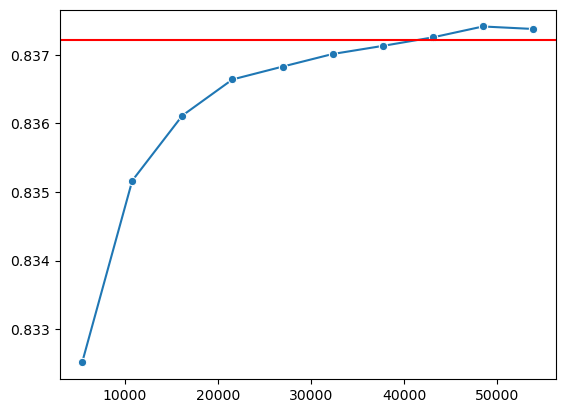

In [6]:
graph = sns.lineplot(x=variance_metrics['subset_sizes'], y=variance_metrics['r2_values'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')
plt.show()

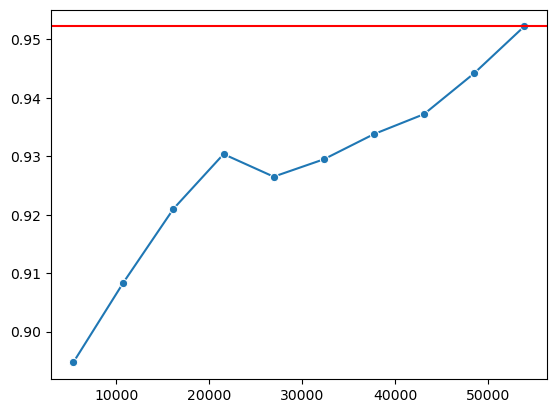

In [7]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_accuracies'], marker="o")
graph.axhline(modelling_metrics['test_accuracies'][-1], color='red')
plt.show()

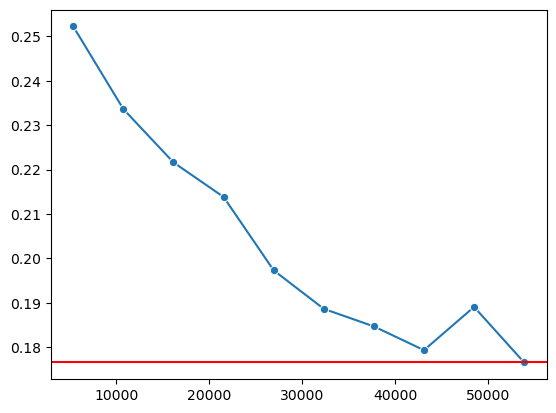

In [8]:
graph = sns.lineplot(x=modelling_metrics['subset_size'], y=modelling_metrics['test_losses'], marker="o")
graph.axhline(modelling_metrics['test_losses'][-1], color='red')
plt.show()

In [9]:
test_accuracies = modelling_metrics['test_accuracies']
mn = min(test_accuracies)
mx = max(test_accuracies)

norm = mx - mn

scaled_acc_values = [(val - mn)/norm for val in test_accuracies]
scaled_acc_values

[0.0,
 0.2377260981912138,
 0.45736434108527174,
 0.62015503875969,
 0.5529715762273893,
 0.6046511627906965,
 0.6795865633074939,
 0.739018087855296,
 0.8604651162790701,
 1.0]

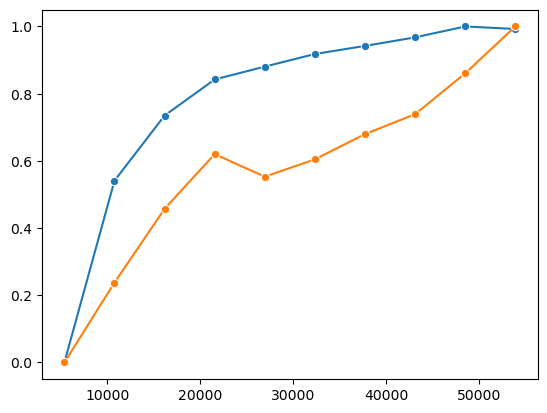

In [10]:
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_r2_values, marker="o")
sns.lineplot(x=variance_metrics['subset_sizes'], y=scaled_acc_values, marker="o")
plt.show()

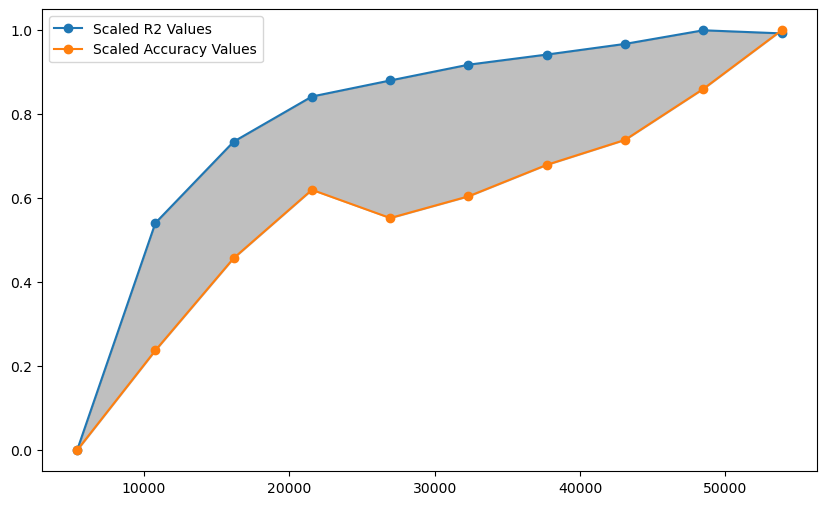

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(variance_metrics['subset_sizes'], scaled_r2_values, marker="o", label='Scaled R2 Values')
plt.plot(variance_metrics['subset_sizes'], scaled_acc_values, marker="o", label='Scaled Accuracy Values')
plt.fill_between(variance_metrics['subset_sizes'], scaled_r2_values, scaled_acc_values, color='gray', alpha=0.5)
plt.legend()
plt.show()